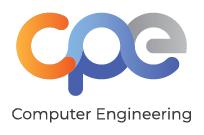

## Artificial Neural Network Implementation with Matrix Data structure (using numpy module)  

---

### ขั้นตอนที่ 1: รู้จักข้อมูล Data set  
ในขั้นตอนนี้คือ กระบวนการโหลด data set เข้าสู่โปรแกรมของเรา โดยมาก data set จะอยู่ในไฟล์ .csv ดังนั้นเราต้องเปิดไฟล์ .csv แล้วทำการ โหลดข้อมูลมาเก็บไว้ก่อน
เราสามารถเรียกใช้ moduleอื่นๆ  เข้ามาช่วยจัดการได้เช่น csv  หรือ pandas  
**import csv** หรือ **import pandas as pd**  
ในที่นี่จะใช้ csv module เพื่อดึงข้อมูลเข้ามาใส่ใน array ของ numpy module

In [145]:
import csv
import numpy as np


In [146]:
# Load Data Set
with open('example_dataset.csv') as Data_file:
    Data_list = csv.reader(Data_file)
    Data = [Data for Data in Data_list]
    print(Data)
Rawdata_array = np.asarray(Data) # Load Data จาก List ให้กลายเป็น Array

#ลองพิมพ์ตัวอย่างของข้อมูลที่โหลดเข้ามาเพื่อการตรวจสอบ
print("Example of rawdata[{0:3d}]: {1}".format(0,Rawdata_array[0]))
print("Example of rawdata[{0:3d}]: {1}".format(1,Rawdata_array[1]))
print("         :           :                    :  ")
print("Example of rawdata[{0:3d}]: {1}".format(len(Rawdata_array)-2,Rawdata_array[-2]))
print("Example of rawdata[{0:3d}]: {1}".format(len(Rawdata_array)-1,Rawdata_array[-1]))
print("Number of rawdata:", len(Rawdata_array))

[['0.5', '0.8', '0.5', '0.2', 'Scissors'], ['0.5', '0.7', '0.7', '0.5', 'Scissors'], ['0.6', '0.9', '0.3', '0.2', 'Scissors'], ['0.3', '0.8', '0.3', '0.5', 'Scissors'], ['0.4', '0.9', '0.6', '0.5', 'Scissors'], ['0.6', '0.8', '0.8', '0.2', 'Scissors'], ['0.3', '0.8', '0.2', '0.2', 'Scissors'], ['0.4', '0.8', '0.4', '0.4', 'Scissors'], ['0.5', '0.7', '0.8', '0.5', 'Scissors'], ['0.3', '0.8', '0.6', '0.5', 'Scissors'], ['0.4', '0.7', '0.6', '0.3', 'Scissors'], ['0.6', '0.9', '0.4', '0.2', 'Scissors'], ['0.4', '0.9', '0.5', '0.5', 'Scissors'], ['0.5', '0.8', '0.6', '0.2', 'Scissors'], ['0.6', '0.7', '0.2', '0.4', 'Scissors'], ['0.3', '0.8', '0.5', '0.3', 'Scissors'], ['0.4', '0.7', '0.3', '0.5', 'Scissors'], ['0.3', '0.9', '0.7', '0.3', 'Scissors'], ['0.5', '0.9', '0.9', '0.5', 'Scissors'], ['0.5', '0.9', '0.6', '0.4', 'Scissors'], ['0.3', '0.8', '0.8', '0.2', 'Scissors'], ['0.5', '0.9', '0.4', '0.5', 'Scissors'], ['0.4', '0.8', '0.5', '0.5', 'Scissors'], ['0.5', '0.7', '0.5', '0.3', 'Sci

ในตอนแรกข้อมูลที่เป็น feature และ target จะถูกโหลดมารวมกันอยู่ใน array เดียวกัน จึงต้องแยกข้อมูลออกเป็นส่วนที่เป็น input's feature และ เป็น output's target

In [147]:
Input_array = np.zeros((len(Rawdata_array),len(Rawdata_array[0])-1),dtype = 'f')
Target_list = list()
for i in range(len(Rawdata_array)):
        # แยกระหว่าง Input และ Output
        Input_array[i] = np.array(Rawdata_array[i][0:len(Rawdata_array[i])-1],dtype = 'f')
        Target_list.append(Rawdata_array[i][-1]) # แยก target ออกมา
        
#ลองพิมพ์ทั้งส่วนที่เป็น feature และ target เพื่อการตรวจสอบ
print("Example of Input[{0:3d}]: {1}".format(0,Input_array[0]))
print("Example of Input[{0:3d}]: {1}".format(1,Input_array[1]))
print("         :         :              :  ")
print("Example of Input[{0:3d}]: {1}".format(len(Input_array)-2,Input_array[-2]))
print("Example of Input[{0:3d}]: {1}".format(len(Input_array)-1,Input_array[-1]))
print("Shape of Input: ",Input_array.shape)

print("\nExample of Target[{0:3d}]: {1}".format(0,Target_list[0]))
print("Example of Target[{0:3d}]: {1}".format(1,Target_list[1]))
print("         :      :           :  ")
print("Example of Target[{0:3d}]: {1}".format(len(Target_list)-2,Target_list[-2]))
print("Example of Target[{0:3d}]: {1}".format(len(Target_list)-1,Target_list[-1]))
print("Number of Target:", len(Target_list))

Example of Input[  0]: [0.5 0.8 0.5 0.2]
Example of Input[  1]: [0.5 0.7 0.7 0.5]
         :         :              :  
Example of Input[148]: [0.7 0.2 0.7 0.2]
Example of Input[149]: [0.8 0.2 0.9 0.1]
Shape of Input:  (150, 4)

Example of Target[  0]: Scissors
Example of Target[  1]: Scissors
         :      :           :  
Example of Target[148]: Paper
Example of Target[149]: Paper
Number of Target: 150


___
### ขั้นตอนที่2: clean Data  
ในขั้นตอนนี้ เมื่อเราไม่แน่ใจว่าข้อมูลที่โหลดเข้ามา มีข้อมูลที่ผิดพลาดหรือไม่ ให้ ทำการ clean data ก่อน โดยในบางครั้ง ข้อมูลอาจจะมีค่าที่ผิดพลาดได้เช่น ค่าเกินกว่าช่วงที่กำหนด หรือ ค่าขาดหายไป (อาจจะถูกบันทึกเป็น 0 หรือ N/A หรือ None) เราสามารถแก้ไขได้โดยวิธีต่าง ๆ เช่น ปรับช่วงให้ใหม่ หรือ เติมข้อมูลที่ขาดหายไป ถ้าหากข้อมูลมีจำนวน observation มาเพียงพอ เราอาจจะตัดข้อมูลใน observation หรือ record นั้นทิ้งไปเลยก็ได้  
* สำหรับข้อมูลในส่วนที่เป็น input นอกจากทำการ clean data แล้วยังต้องปรับ data type ให้ถูกต้องก่อน เนื่องจากในการ load มาอาจจะเป็นอยู่ในรูปของ text อยู่
* ลองเข็คค่าทางสถิติสำหรับแต่ละ feature ดูว่ามีความเหมาะสมหรือไม่ เช่น ไม่มี feature ใด feature หนึ่งที่มีค่าสูงมากเกินไป และ อาจจะทำการ normalize หรือ standardize แต่ละ feature ให้มีช่วงของค่าและการกระจายตัวที่สมดุลกัน เราเรียกกระบวนการเหล่านี้ว่า Pre-Processing
* สำหรับข้อมูลในส่วนที่เป็น output ถ้าหากได้รับข้อมูลที่ label มาเป็น character เช่น Y/N หรือ True/False ให้เปลี่ยนเป็น integer เช่น 0/1   

* ถ้าข้อมูลเป็นแบบ multiclass (มีการแบ่งคราสมากกว่า 2 class ขึ้นไป) อาจจะเปลี่ยนจำนวน output ให้เท่ากับจำนวนclass เช่น ปรับให้อยู่ในรูปนี้ class1 = 0 0 1, class2 = 0 1 0, class3 = 1 0 0

In [148]:
# หากพบว่ามีข้อมูลที่ว่างเปล่าอยู่จึงทำการลบทิ้ง เช่น
# Input_array = np.delete(Input_array,150,0)
print("Shape of Cleaned Input:", Input_array.shape)
NumData, NumInput = Input_array.shape
print(NumData)
print(NumInput)

Shape of Cleaned Input: (150, 4)
150
4


In [149]:
#targetอาจจะมาในรูปของ text เลยต้องแปลงให้กลายเป็นตัวเลข หรือ เข็คจำนวนของ class
# แปลงตัวคลาสให้อยู่ในรูป 001 010 100
Class = list(set(Target_list))
NumOutput = len(Class)
print(NumOutput)

3


In [150]:
#ปรับให้อยู่ในรูปนี้ class1 = 0 0 1, class2 = 0 1 0, class3 = 1 0 0
Target_array = np.zeros((NumData,NumOutput), dtype='i') # ให้ทุกตัวเป็น 0 0 0
for i in range(NumData):
    Target_array[i][Class.index(Target_list[i])] = 1

In [151]:
Target_array

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

---
### ขั้นตอนที่3: แบ่งข้อมูลออกเป็น trian set และ test set   
เรามีความจำเป็นต้องแบ่งข้อมูลออกเป็น2 ส่วนคือ train set คือ ข้อมูลที่เอาไว้สำหรับ train model ANN และ test set สำหรับทดสอบหาความแม่นยำของ model   
ในขั้นนี้ สามารถใช้ เทคนิค k-fold cross validation ได้ โดยแบ่งข้อมูลออกเป็น k ชุด ให้ k-1 ชุดแรก เป็น train set และทีเหลืออีกหนึ่งเป็น test set   
และสลับการทดลอง train และ test ทดสอบความแม่นยำ กันทั้งหมด k รอบ โดยให้ข้อมูลทุกชุดได้เป็น train set และ ได้เป็น test set อย่างน้อย 1 ครั้ง   

ในทางโปรแกรม เราสามารถใช้ slicing เพื่อช่วยให้ง่ายขึ้นได้

โดยพยายามแบ่งจำนวน class ใน train set ให้เท่า ๆ กันทุก class เพื่อไม่ให้ model ของเราเกิดการ bias ไปยัง class ใด class หนึ่งขึ้น  

In [152]:
#ตัวอย่างเช่น มีข้อมูลที่ถูกเรียงลำดับแล้ว มีอยู่ 3 class classละ 50 ตัวอย่าง แบ่งเป็น 5 fold-crossvalidation
#เพราะฉะนั้น train set = 120 ตัว  และ test set = 30 ตัว
#เราจะทำการ train และ test ทั้งหมด 5 รอบ แล้วหาค่าเฉลี่ยความแม่นยำ
# รอบแรก (round 1) จะใช้ข้อมูล fold 1, 2, 3, 4 เป็น train set และ ใช้ fold 5 เป็น test set
# จำนวนของ train data  = 4*Numdata/5 (80%)
# จำนวน test data = Numdata/5 (20%)
Input_Train = np.zeros((120,4),dtype='f') # zeros คือใส่ แถว และหลัก
Input_Test = np.zeros((30,4),dtype='f')
Target_Train = np.zeros((120,3),dtype='i')
Target_Test = np.zeros((30,3),dtype='i')

NumTest = 0
NumTrain = 0
for i in range(NumData):
    #round 1 fold 1,2,3,4 เป็น train set และ fold5 เป็น test set
    if (i%5) == 4: # ชุดไหน Mod 4 จะเก็บไว้เป็น Test Set
        Input_Test[NumTest] = Input_array[i]
        Target_Test[NumTest] = Target_array[i]
        NumTest += 1
    else:
        Input_Train[NumTrain] = Input_array[i]
        Target_Train[NumTrain] = Target_array[i]
        NumTrain += 1
print('Number of Train data: ',NumTrain)
print('Number of Test data: ',NumTest)

Number of Train data:  120
Number of Test data:  30


In [153]:
np.random.seed(14)

In [154]:
# converting the input in matrix form
Input = Input_Train.T
print("Input in matrix form:\n", Input)

# shape of input matrix
print("\nShape of Input Matrix:", Input.shape)

Input in matrix form:
 [[0.5 0.5 0.6 0.3 0.6 0.3 0.4 0.5 0.4 0.6 0.4 0.5 0.3 0.4 0.3 0.5 0.3 0.5
  0.4 0.5 0.4 0.4 0.3 0.4 0.3 0.6 0.6 0.3 0.3 0.6 0.3 0.3 0.4 0.5 0.3 0.6
  0.3 0.6 0.3 0.5 0.2 0.1 0.1 0.1 0.1 0.3 0.2 0.2 0.1 0.3 0.2 0.1 0.1 0.2
  0.1 0.2 0.3 0.3 0.2 0.1 0.3 0.2 0.3 0.2 0.2 0.3 0.3 0.2 0.1 0.2 0.1 0.2
  0.3 0.2 0.3 0.3 0.2 0.2 0.3 0.2 0.8 0.9 0.9 1.  0.7 0.6 0.7 1.  0.9 0.6
  0.7 1.  0.7 0.9 0.8 0.8 0.8 0.7 0.7 0.9 0.8 0.6 1.  0.8 0.6 0.7 0.7 0.7
  0.7 0.6 0.6 1.  0.9 0.6 1.  0.6 0.8 1.  0.8 0.7]
 [0.8 0.7 0.9 0.8 0.8 0.8 0.8 0.7 0.7 0.9 0.9 0.8 0.8 0.7 0.9 0.9 0.8 0.9
  0.8 0.7 0.8 0.9 0.9 0.9 0.7 0.9 0.9 0.8 0.8 0.8 0.9 0.7 0.8 0.7 0.9 0.9
  0.9 0.9 0.8 0.7 0.8 0.8 0.7 0.9 0.8 0.9 0.7 0.7 0.8 0.7 0.7 0.7 0.8 0.7
  0.7 0.8 0.7 0.7 0.8 0.8 0.7 0.7 0.7 0.7 0.7 0.9 0.7 0.9 0.7 0.8 0.9 0.8
  0.9 0.7 0.9 0.9 0.9 0.8 0.7 0.9 0.3 0.3 0.6 0.4 0.5 0.5 0.3 0.3 0.4 0.6
  0.5 0.4 0.1 0.1 0.2 0.6 0.2 0.2 0.1 0.2 0.6 0.1 0.1 0.1 0.3 0.3 0.4 0.4
  0.1 0.1 0.5 0.4 0.4 0.5 0.1 0.5 0.4 

In [155]:
# output in matrix form
Target = Target_Train.T

print("\nTarget in matrix form:\n", Target)

# shape of input array
print("\nShape of Target:", Target.shape)


Target in matrix form:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]

Shape of Target: (3, 120)


----
### ขั้นตอนที่ 4 กำหนด Hyperparameter ต่าง ๆ ของ Model  
กำหนดขนาดของ ANN, Learning rate, Activate function เช่น
* จำนวน Input Unit = จำนวน feature 
* จำนวน Hidden Layer = 1 ขึ้นไป (เริ่มต้นด้วย 1 หรือ 2) 
* จำนวน Hidden Unit = ประมาณครึ่งหนี่ง หรือ 2/3 ของจำนวน Input Unit  + จำนวน Output Unit (ตาม Rule of Thumbs)
* จำนวน Output Unit = จำนวน class (ในกรณีที่เป็น 2 class สามารถลดลงเหลือ 1 unit ได้)  
* Learning Rate = ค่าน้อย ๆ เช่น 0.01 หรือ 0.005 
* Activate Function เช่น Sigmoid หรือ ReLu  

จากขนาดของ ANN และ Input data จะทำให้เกิด
1. Input Matrix เป็น Matrix ที่เกิดจากเอา Input Unit vector มาประกอบกัน ทำให้มีขนาดเป็น จำนวนแถวเป็น จำนวน feature และจำนวนคอลัมภ์เป็น จำนวน observation = No.Input unit x No.Observation  
2. Hidden Unit vector = No.Hidden unit x 1  ขึ้นกับว่า มี Hidden Layer กี่ layer ถ้ามีมากกว่า 1 ก็จะมี Hidden vector มากกว่า 1 ตัว
3. Output Unit vector = No.Output unit x 1
4. Weight Matirx เช่น No.Input Unit x  No.Output Unit หรือใน layer ถัด ๆไป

In [156]:
#Number of Input Unit = 4
#Number of Output Unit = 3
#Number of Hidden Layer is 1
#Number of Hidden Unit = 2/3 * NumInput + NumOutput (Rule of Thumbs จะต้องเป็น 2/3 ของ Input + Output)
NumHidden = 6
print("No.Input Unit: ",NumInput)
print("No.Hidden Layer: ", 1)
print("No.Hidden Unit: ",NumHidden)
print("No.Output Unit: ",NumOutput)

No.Input Unit:  4
No.Hidden Layer:  1
No.Hidden Unit:  6
No.Output Unit:  3


----
### ขั้นตอนที่ 5 เริ่มกระบวนการ Train  
1. กำหนดค่า weight ใน Weight Matrix เร่ิมต้น โดยการ Random ค่าระหว่าง -0.1 ~ 0.1  
2. นำ Input vector จาก Input Matrix เข้าสู่กระบวนการ train ทีละ vector โดยทำการเรียงลำดับด้วยการ random หมายความว่า แต่ละรอบใช้ Label ที่ต่าง ๆกัน
3. นำ Input vector มา dot กับ Weight Matrix แล้ว มาผ่าน Activate function เพื่อเป็น Output vector (หรือ Hidden unit vector)
   e.g. output = sigmoid(dot(w,input + b)  
4. ทำทีละ Layer จนกระทั้งถึง Output layer
5. เมื่อได้ Output แล้วนำมาคำนวณ Error เพื่อนำมาเข้าสู่กระบวนการปรับ weight ด้วย Back propragation algorithm

In [157]:
# กำหนดค่าเริ่มต้นของ weight ในแต่ละส่วน 
# ชุดที่อยู่ระหว่าง Input กับ Hidden และ Hidden กับ Output
weights_input_hidden = np.random.uniform(low= -0.1, high = 0.1, size=(NumInput, NumHidden))
weights_hidden_output = np.random.uniform(low = -0.1, high = 0.1, size=(NumHidden, NumOutput))
# shape of weight matrix
weights_input_hidden.shape, weights_hidden_output.shape

((4, 6), (6, 3))

In [158]:
weights_input_hidden

array([[ 0.00278867,  0.05463301,  0.07408554, -0.09839061, -0.03805281,
         0.09152075],
       [ 0.00262334, -0.03634312,  0.00783999, -0.05574901,  0.06129627,
        -0.03154907],
       [ 0.00777777, -0.09882524,  0.0346305 , -0.05799515,  0.08651152,
        -0.02515105],
       [ 0.05048378,  0.0526278 ,  0.07409989, -0.07797776, -0.0399816 ,
        -0.00501885]])

In [159]:
# กำหนด Acitvate function ที่จะนำมาใช้
def sigmoid(x): # หรือ Logistic Function
    return 1 / (1 + np.exp(-x))

In [160]:
# random ลำดับของ input ที่จะถูกป้อนเข้า nerual net เพื่อใช้ในการ train
''' Technique เวลาเราป้อน Patterns เข้าไป ควรจะ Random patterns หรือ Order อีกครั้ง
 เพราะถ้ามันเจอ ค้อนๆๆๆๆ กรรไกรๆๆๆ ค่า weight ที่ปรับ มันจะปรับทางค้อน, กระดาษ วนไป 500 รอบ , สรุปคือมันปรับกลับมาที่เดิม ไม่มีประสิทธิภาพ
 ค่า weight มันจะไปกองที่ Dataset ส่วนสุดท้าย
 '''
Train_seq = np.random.permutation(NumTrain)
print(Train_seq)

[ 15  24  73  84 109  20 108  41  54  47  66  25   6 107  51  79  45   5
 111  13  74 105  57  31  86  44  98  93 112  23  77  80  61   2  18  21
  69  70  58  30 116  22  37  39   7  36  53  68  90  42  29  46  40  96
  95  71  14  64 117  82  19 106 115  43  27  88   0  34  65  87   8  38
 103  49  26 119  75 114  63  33  55  76  59 113 104  89  91  72  99  56
  67  94 102  62 118  10  81  32  35  48  83  17  85  28  12  97   3 100
  11   1  52 101  16  50   4  78   9  60 110  92]


In [161]:
# เพื่อให้ยังคงเป็น dim = 1 จึงต้อง reshape อีกครั้งแต่ข้อมูลไม่ได้เปลี่ยน
print(Input[:,Train_seq[11]])
print(Input[:,Train_seq[11]].reshape(NumInput,1))
print(Input[:,Train_seq[11]].reshape(NumInput,1).shape)

[0.6 0.9 0.7 0.5]
[[0.6]
 [0.9]
 [0.7]
 [0.5]]
(4, 1)


## FeedForward  
คือกระบวนการส่ง Information ที่เกิดจากการคำนวณจาก Input Layer ไปยัง Hidden Layer และ ไปยัง Output Layer โดยที่แต่ละ Layer ที่ Neural Node นั้น ๆ ต้องผ่าน Activate function ด้วย   
ซึ่งในตัวอย่างนี้จะใช้ sigmoid  เป็น activate function

#### ให้ X  --> input vector และ Y --> target vector
#### hidden_layer_input= matrix_dot_product(X,w<sub>h</sub>) + b<sub>h</sub>
#### hiddenlayer_activations = sigmoid(hidden_layer_input)

In [162]:
# at hidden layer
# calculate hidden units and activated hidden units
Hidden = np.dot(weights_input_hidden.T,Input[:,Train_seq[0]].reshape(NumInput,1))
print(Hidden)
Hidden = sigmoid(Hidden)

[[ 0.03599723]
 [-0.06802111]
 [ 0.11231615]
 [-0.19055393]
 [ 0.0940098 ]
 [-0.00777916]]


In [163]:
print(Hidden)
print(Hidden.shape)

[[0.50899834]
 [0.48300128]
 [0.52804956]
 [0.45250515]
 [0.52348516]
 [0.49805522]]
(6, 1)


In [186]:
print(sigmoid(0.03599723))

0.5089983358502589


#### output_layer_input = matrix_dot_product (hiddenlayer_activations, w<sub>out</sub> ) + b<sub>out</sub>
#### output = sigmoid(output_layer_input)

In [164]:
# at output layer
# calculate output units and activated output units
Output = np.dot(weights_hidden_output.T,Hidden)
Output = sigmoid(Output)

In [165]:
print(Output)
print(Output.shape)

[[0.49838968]
 [0.48955611]
 [0.51690906]]
(3, 1)


### ในขั้นตอนถัดไป คือ Backpropagation alogrithm เพื่อเป้าหมายคือการ การปรับค่า weight ให้ ได้ค่า weight ที่เหมาะสมทำให้ได้ค่า output ใกล้เคียงกับ ค่า Target มากที่สุด
โดยจะทำงานย้อนกลับไปที่ละ layer จาก output ย้อนกลับไปหา input

#### ตามปรกติ Error = Y – Output
#### หรือคิดเป็น Mean Square Error (MSE) --> Error = ((Y - Output)<sup>2</sup>) /2

In [166]:
# at output layer 
# calculating error
Error = (np.square(Target[:,Train_seq[0]].reshape(NumOutput,1) - Output) / 2)
print(Error)
print(Error.shape)

[[0.12419614]
 [0.11983259]
 [0.11668843]]
(3, 1)


In [167]:
# rate of change of error w.r.t. output
# dE/dO
Error_wrt_output = -(Target[:,Train_seq[0]].reshape(NumOutput,1) - Output)
print(Error_wrt_output)
print(Error_wrt_output.shape)

[[ 0.49838968]
 [ 0.48955611]
 [-0.48309094]]
(3, 1)


![image](asset/back_Output_Hidden_pic.png)

![image](asset/back_Output_Hidden_equ.png)

In [168]:
# rate of change of output w.r.t. Z2
# dO/dZ2
Output_wrt_outputLayer_LinearTransform = np.multiply(Output, (1 - Output))
print(Output_wrt_outputLayer_LinearTransform)
print(Output_wrt_outputLayer_LinearTransform.shape)

[[0.24999741]
 [0.24989093]
 [0.24971408]]
(3, 1)


In [169]:
# rate of change of Z2 w.r.t. weights between hidden and output layer
# dZ2/dWho
OutputLayer_LinearTransform_wrt_weights_hidden_output = Hidden
print(OutputLayer_LinearTransform_wrt_weights_hidden_output)
print(OutputLayer_LinearTransform_wrt_weights_hidden_output.shape)

[[0.50899834]
 [0.48300128]
 [0.52804956]
 [0.45250515]
 [0.52348516]
 [0.49805522]]
(6, 1)


In [170]:
# rate of change of error w.r.t weight between hidden and output layer
# dE/dWho 
Error_wrt_weights_hidden_output = np.dot(OutputLayer_LinearTransform_wrt_weights_hidden_output,
    (Error_wrt_output * Output_wrt_outputLayer_LinearTransform).T,)
print(Error_wrt_weights_hidden_output)
print(Error_wrt_weights_hidden_output.shape)

[[ 0.06341922  0.06226863 -0.06140282]
 [ 0.06018009  0.05908827 -0.05826667]
 [ 0.06579293  0.06459928 -0.06370105]
 [ 0.05638039  0.0553575  -0.05458778]
 [ 0.06522422  0.06404089 -0.06315043]
 [ 0.06205575  0.0609299  -0.0600827 ]]
(6, 3)


![image](asset/back_Hidden_Input_pic.png)

![image](asset/back_Hidden_Input_equ.png)

In [171]:
# rate of change of error w.r.t. output
Error_wrt_output = -(Target[:,Train_seq[0]].reshape(NumOutput,1) - Output)
print(Error_wrt_output)
print(Error_wrt_output.shape)

[[ 0.49838968]
 [ 0.48955611]
 [-0.48309094]]
(3, 1)


In [172]:
# rate of change of output w.r.t. Z2
Output_wrt_outputLayer_LinearTransform = np.multiply(Output, (1 - Output))
print(Output_wrt_outputLayer_LinearTransform)
print(Output_wrt_outputLayer_LinearTransform.shape)

[[0.24999741]
 [0.24989093]
 [0.24971408]]
(3, 1)


In [173]:
# rate of change of Z2 w.r.t. hidden layer activations
OutputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
print(OutputLayer_LinearTransform_wrt_hiddenLayer_activations)
print(OutputLayer_LinearTransform_wrt_hiddenLayer_activations.shape)

[[ 0.03458734 -0.04848151  0.04023026]
 [ 0.03140001 -0.06359845 -0.0355874 ]
 [ 0.07750749 -0.08333017  0.04931282]
 [-0.08752999  0.04629623  0.04850227]
 [-0.01841684  0.0982766  -0.00957254]
 [-0.06202429 -0.02967471  0.04296233]]
(6, 3)


In [174]:
# rate of change of hidden layer activations w.r.t. Z1
HiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(Hidden, (1 - Hidden))
print(HiddenLayer_activations_wrt_hiddenLayer_linearTransform)
print(HiddenLayer_activations_wrt_hiddenLayer_linearTransform.shape)

[[0.24991903]
 [0.24971104]
 [0.24921322]
 [0.24774424]
 [0.24944845]
 [0.24999622]]
(6, 1)


In [175]:
# rate of change of Z1 w.r.t. weights between input and hidden layer
HiddenLayer_linearTransform_wrt_weights_input_hidden = Input[:,Train_seq[0]].reshape(NumInput,1)
print(HiddenLayer_linearTransform_wrt_weights_input_hidden)
print(HiddenLayer_linearTransform_wrt_weights_input_hidden.shape)

[[0.5]
 [0.9]
 [0.9]
 [0.5]]
(4, 1)


In [176]:
# shape of weights of hidden layer
print(weights_input_hidden)
print(weights_input_hidden.shape)

[[ 0.00278867  0.05463301  0.07408554 -0.09839061 -0.03805281  0.09152075]
 [ 0.00262334 -0.03634312  0.00783999 -0.05574901  0.06129627 -0.03154907]
 [ 0.00777777 -0.09882524  0.0346305  -0.05799515  0.08651152 -0.02515105]
 [ 0.05048378  0.0526278   0.07409989 -0.07797776 -0.0399816  -0.00501885]]
(4, 6)


In [177]:
# rate of change of error w.r.t weights between input and hidden layer
Error_wrt_weights_input_hidden = np.dot(
    HiddenLayer_linearTransform_wrt_weights_input_hidden,
    (
        HiddenLayer_activations_wrt_hiddenLayer_linearTransform
        * np.dot(OutputLayer_LinearTransform_wrt_hiddenLayer_activations,
            (Output_wrt_outputLayer_LinearTransform * Error_wrt_output),
        )
    ).T,)
print(Error_wrt_weights_input_hidden)
print(Error_wrt_weights_input_hidden.shape)

# ค่า Error

[[-8.09079072e-04  5.30680852e-05 -8.08192075e-04 -1.37414718e-03
   1.35735412e-03 -2.06759431e-03]
 [-1.45634229e-03  9.55225509e-05 -1.45474570e-03 -2.47346487e-03
   2.44323736e-03 -3.72166966e-03]
 [-1.45634229e-03  9.55225509e-05 -1.45474570e-03 -2.47346487e-03
   2.44323736e-03 -3.72166966e-03]
 [-8.09079072e-04  5.30680852e-05 -8.08192075e-04 -1.37414718e-03
   1.35735412e-03 -2.06759431e-03]]
(4, 6)


In [178]:
# กำหนดค่า learning rate
alpha = 0.01

In [179]:
# updating the weights of output layer
print("weights_hidden_output: before update")
print(weights_hidden_output)
weights_hidden_output = weights_hidden_output - alpha * Error_wrt_weights_hidden_output
print("\nweights_hidden_output: updated")
print(weights_hidden_output)

weights_hidden_output: before update
[[ 0.03458734 -0.04848151  0.04023026]
 [ 0.03140001 -0.06359845 -0.0355874 ]
 [ 0.07750749 -0.08333017  0.04931282]
 [-0.08752999  0.04629623  0.04850227]
 [-0.01841684  0.0982766  -0.00957254]
 [-0.06202429 -0.02967471  0.04296233]]

weights_hidden_output: updated
[[ 0.03395315 -0.0491042   0.04084429]
 [ 0.03079821 -0.06418933 -0.03500473]
 [ 0.07684956 -0.08397616  0.04994983]
 [-0.08809379  0.04574265  0.04904815]
 [-0.01906908  0.09763619 -0.00894104]
 [-0.06264485 -0.030284    0.04356316]]


In [180]:
# updating the weights of hidden layer
print("weights_input_hidden: before update")
print(weights_input_hidden)
weights_input_hidden = weights_input_hidden - alpha * Error_wrt_weights_input_hidden
print("\nweights_input_hidden: updated")
print(weights_input_hidden)

weights_input_hidden: before update
[[ 0.00278867  0.05463301  0.07408554 -0.09839061 -0.03805281  0.09152075]
 [ 0.00262334 -0.03634312  0.00783999 -0.05574901  0.06129627 -0.03154907]
 [ 0.00777777 -0.09882524  0.0346305  -0.05799515  0.08651152 -0.02515105]
 [ 0.05048378  0.0526278   0.07409989 -0.07797776 -0.0399816  -0.00501885]]

weights_input_hidden: updated
[[ 0.00279676  0.05463248  0.07409362 -0.09837687 -0.03806639  0.09154142]
 [ 0.00263791 -0.03634407  0.00785453 -0.05572428  0.06127184 -0.03151186]
 [ 0.00779233 -0.0988262   0.03464504 -0.05797041  0.08648709 -0.02511383]
 [ 0.05049188  0.05262727  0.07410797 -0.07796402 -0.03999518 -0.00499817]]


----
ขั้นตอนที่ 5 (ต่อ) ทำกระบวนการ Train ต่อไป จนครบทุก pattern แล้วเริ่มทำอีกครั้ง (Random ลำดับการป้อน Input ใหม่) เรียกว่า จบ 1 Epoch หรือ 1 iteration   
ทำซ้ำ ๆ อีกหลาย ๆ Epoch/iteration จนกระทั้ง Error (Mean square Error) มีค่าลดลงต่ำที่สุด จึงจบกระบวนการ Train  
อาจจะต้องมีการปรับค่าบางอย่างเพื่อทำให้ Neural Network ทำกระบวนการ Train ได้ดีขึ้น เช่น 
hyperparameter ต่าง ๆ จำนวน Epoch หรือ อาจจะใช้เทคนิคอื่น ๆ เช่น weight decay , momentum (ต้องศึกษาเพิ่มเติม)

In [181]:
# กำหนด Train Set และ Test set
NumTest = 0
NumTrain = 0
for i in range(NumData):
    #round 1 fold 1,2,3,4 เป็น train set และ fold5 เป็น test set
    if (i%5) == 4:
        Input_Test[NumTest] = Input_array[i]
        Target_Test[NumTest] = Target_array[i]
        NumTest += 1
    else:
        Input_Train[NumTrain] = Input_array[i]
        Target_Train[NumTrain] = Target_array[i]
        NumTrain += 1
print('Number of Train data: ',NumTrain)
print('Number of Test data: ',NumTest)

np.random.seed(14)
Input = Input_Train.T
Target = Target_Train.T

Number of Train data:  120
Number of Test data:  30


In [182]:
# จากข้างต้นทั้งหมด สรุปรวมได้ดังนี้
# กำหนดขนาดของ Network
NumInput = 4
#Number of Hidden Layer = 1
NumHidden = 6
NumOutput = 3
# กำหนดค่าเริ่มต้นของ Weight
weights_input_hidden = np.random.uniform(size=(NumInput,NumHidden))
weights_hidden_output = np.random.uniform(size=(NumHidden, NumOutput))
# กำหนดค่า learning rate
alpha = 0.01


# กำหนด Acitvate function ที่จะนำมาใช้
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# กำหนดจำนวน Epoch
epochs = 1000

In [183]:
losses = []
for epoch in range(epochs):
    # random ลำดับของ input ที่จะถูกป้อนเข้า nerual net เพื่อใช้ในการ train
    Train_seq = np.random.permutation(NumTrain)
    
    # Start Train
    for i in range(NumTrain):
    
        #########################
        ## Forward Propogation ##
        #########################
        # calculating hidden layer activations
        Hidden = np.dot(weights_input_hidden.T,Input[:,Train_seq[i]].reshape(NumInput,1) )
        Hidden = sigmoid(Hidden)

        # calculating the output
        Output = np.dot(weights_hidden_output.T, Hidden)
        Output = sigmoid(Output)
        
        ##########################
        ## Backward Propagation ##
        ##########################
        # calculating error
        Error = np.square(Target[:,Train_seq[i]].reshape(NumOutput,1) - Output) / 2

        # calculating rate of change of error w.r.t weight between hidden and output layer
        Error_wrt_output = -(Target[:,Train_seq[i]].reshape(NumOutput,1) - Output)
        Output_wrt_outputLayer_LinearTransform = np.multiply(Output, (1 - Output))
        OutputLayer_LinearTransform_wrt_weights_hidden_output = Hidden

        Error_wrt_weights_hidden_output = np.dot(OutputLayer_LinearTransform_wrt_weights_hidden_output,
                                                 (Error_wrt_output * Output_wrt_outputLayer_LinearTransform).T,)

        # calculating rate of change of error w.r.t weights between input and hidden layer
        OutputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
        HiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(Hidden, (1 - Hidden))
        HiddenLayer_linearTransform_wrt_weights_input_hidden = Input[:,Train_seq[i]].reshape(NumInput,1)
        Error_wrt_weights_input_hidden = np.dot(HiddenLayer_linearTransform_wrt_weights_input_hidden,
            (HiddenLayer_activations_wrt_hiddenLayer_linearTransform
                * np.dot(OutputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (Output_wrt_outputLayer_LinearTransform * Error_wrt_output),)).T,)

        # updating the weights
        weights_hidden_output = weights_hidden_output - alpha * Error_wrt_weights_hidden_output
        weights_input_hidden = weights_input_hidden - alpha * Error_wrt_weights_input_hidden

    # print error at every 100th epoch
    epoch_loss = np.average(Error)
    if epoch % 100 == 0:
        print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

Error at epoch 0 is 0.26725
Error at epoch 100 is 0.11300
Error at epoch 200 is 0.04831
Error at epoch 300 is 0.01137
Error at epoch 400 is 0.09345
Error at epoch 500 is 0.00792
Error at epoch 600 is 0.00717


Error at epoch 700 is 0.07103
Error at epoch 800 is 0.05597
Error at epoch 900 is 0.00944


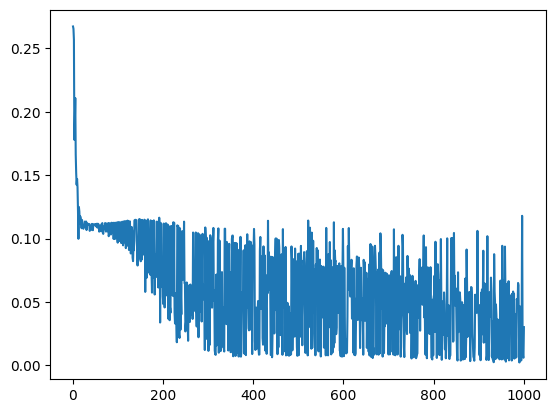

In [184]:
# visualizing the error after each epoch
import matplotlib.pyplot as plt
plt.plot(np.arange(1, epochs + 1), np.array(losses))

## 5000 รอบ
มันเยอะเกินมันแกว่งขึ้นข้างบน
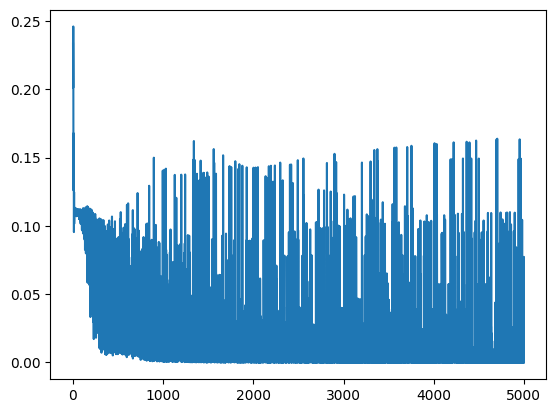

----
### ขั้นตอนที่ 6 ทดสอบ model 
เมื่อกระบวนการ Train (ปรับปรุง weight)เสร็จสิ้น จนเป็นที่พอใจแล้วขั้นตอนต่อไปคือการทดสอบ model  
ให้ทำการโหลด Test set เข้ามาทดสอบ


เอา Weight ที่เกิดจากการ Train แล้วคูณกับ Input Test นั่นเอง

In [185]:
Input = Input_Test.T
Target = Target_Test.T
    
#########################
## Forward Propogation ##
#########################
# calculating hidden layer activations
Hidden = np.dot(weights_input_hidden.T,Input)
Hidden = sigmoid(Hidden)

# calculating the output
Output = np.dot(weights_hidden_output.T, Hidden)
Output = sigmoid(Output)


#check ผล
Class_Output = Output.argmax(axis=0)
Class_Target = Target.argmax(axis=0)
correct = 0
miss = 0
#confusion matrix (row=Actual, col=Predicted)
conf_matrix = np.zeros((NumOutput,NumOutput),dtype='i')
for i in range(NumTest):
    if Class_Output[i] == Class_Target[i]:
        correct += 1
    else:
        miss += 1
    conf_matrix[Class_Target[i]][Class_Output[i]] += 1
print('Confusion Matrix (row=Actual, col=Predicted)')
print(conf_matrix)
print('accuracy = {0:.2f}%'.format(correct/NumTest))

Confusion Matrix (row=Actual, col=Predicted)
[[ 6  1  3]
 [ 0 10  0]
 [ 1  0  9]]
accuracy = 0.83%


### อย่าลืมว่าขณะนี้ทดสอบที่ fold 1 เท่านั้น จะต้องเรียก fold 2, 3, 4, 5 มา Train และ Test ให้ครบ   
### จากนั้นจึงเอา ค่า accuracy ของทั้ง 5 รอบมาหาค่าเฉลี่ยกัน จึงจะได้ ค่า accuracy ของ model 

เรียกว่า เทคนิค Cross-Validation คือการสลับ Train และ Test ทุกตัว เพื่อให้มันทั่วถึงและครอบคลุม แต่เราทำแค่รอบเดียวก็พอ